<H3>1. Data Preparation</H3>
    
Data is read from 'train.csv'. Column px_height and sc_w has values of 0 when px_width and sc_h are not 0. Linear regression models are build to predit the missing values. 

<H3> 2. Exploratory Data Analysis</H3>

Relations of price_range and ram, talk_time, clock_speed are plotted using box plot. Relation of price_range and dual_sim is ploted using count plots. 

Among them, ram has significant correlation with price_range.

<H3> 3. Correlation Matrix</H3>

Correlation matrix is shown using a heatmap. 

a) Correlation is the level of association betwen two variables. If a independent variable has a high correlation with price_range, it could generally explain the variation in price_range better. 

b) If the sign of correlation between A and B is positive, A tends to increase as B increases. If the sign of correlation between A and B is negative, A tends to decrease as B increases. 

<H3> 4. Model Building </H3>

A random forest and a KNN model is built to predict the price_range. 

<H3> 5. Model Evaluation </H3>

Using 10-fold cross validation, the random forest model with feature selection has a mean accuracy of 0.89 and KNN model with K = 12 has a mean accuracy of 0.9365. Moreover, the variance of accuracy score is also lower for KNN model, showing that the KNN model is more robust. Therefore KNN is a better model for price_range prediction. 

<H3> 6. Prediction Visualization </H3>

Scatter plot is drawn to show the relationship between predicted price_range using KNN and (ram & battery power).


In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

<H1> Data Preparation

In [2]:
train_data = pd.read_csv('train.csv')
train_x = train_data.drop(['price_range'],axis = 1)
train_y = train_data['price_range']
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train_x.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [4]:
train_y.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [5]:
train_x[(train_x == 0)].count()
# possible columns with missing value: px_height, sc_w

battery_power       0
blue             1010
clock_speed         0
dual_sim          981
fc                474
four_g            957
int_memory          0
m_dep               0
mobile_wt           0
n_cores             0
pc                101
px_height           2
px_width            0
ram                 0
sc_h                0
sc_w              180
talk_time           0
three_g           477
touch_screen      994
wifi              986
dtype: int64

In [6]:
# predict missing px_height & sc_w
cols_to_fill = ["px_height","sc_w"]
lr_to_fill = {}
for col in cols_to_fill:
    filled = train_x.index[train_x[col] != 0]
    lr = LinearRegression().fit(train_x.loc[filled].drop(col,axis = 1), train_x[col].loc[filled])
    lr_to_fill[col] = lr
    print (col)
    print (lr.score(train_x.loc[filled].drop(col,axis = 1), train_x[col].loc[filled]))
    train_x[train_x[col] == 0].loc[:,col] = lr.predict(train_x[train_x[col] == 0].drop(col,axis = 1))

px_height
0.27116735482513876
sc_w
0.2788270437205345


//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<H1> Exploratory Data Analysis

In [7]:
boxplot_data = train_data[["price_range","ram","talk_time","clock_speed","dual_sim"]].pivot(columns = "price_range",values = ["ram","talk_time","clock_speed","dual_sim"])

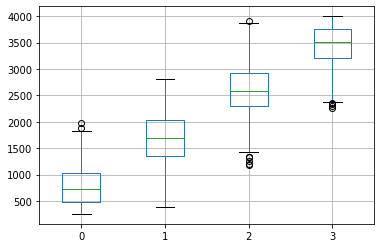

In [8]:
boxplot_data["ram"].boxplot()

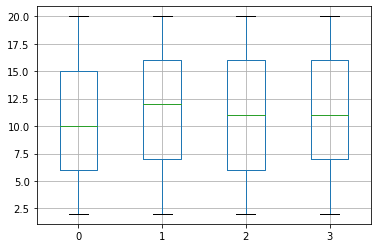

In [9]:
boxplot_data["talk_time"].boxplot()

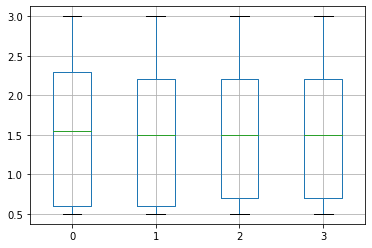

In [10]:
boxplot_data["clock_speed"].boxplot()

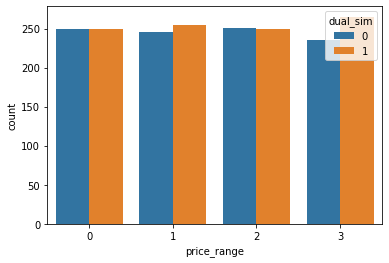

In [11]:
ax = sns.countplot(x="price_range", hue="dual_sim", data=train_data)

<H1> Correlation matrix 

In [12]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
]

corr = train_data.corr()
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)\
    .set_table_styles(magnify())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1,0.011,0.011,-0.042,0.033,0.016,-0.004,0.034,0.0018,-0.03,0.031,0.015,-0.0084,-0.00065,-0.03,-0.021,0.053,0.012,-0.011,-0.0083,0.2
blue,0.011,1,0.021,0.035,0.0036,0.013,0.041,0.004,-0.0086,0.036,-0.01,-0.0069,-0.042,0.026,-0.003,0.00061,0.014,-0.03,0.01,-0.022,0.021
clock_speed,0.011,0.021,1,-0.0013,-0.00043,-0.043,0.0065,-0.014,0.012,-0.0057,-0.0052,-0.015,-0.0095,0.0034,-0.029,-0.0074,-0.011,-0.046,0.02,-0.024,-0.0066
dual_sim,-0.042,0.035,-0.0013,1,-0.029,0.0032,-0.016,-0.022,-0.009,-0.025,-0.017,-0.021,0.014,0.041,-0.012,-0.017,-0.039,-0.014,-0.017,0.023,0.017
fc,0.033,0.0036,-0.00043,-0.029,1,-0.017,-0.029,-0.0018,0.024,-0.013,0.64,-0.01,-0.0052,0.015,-0.011,-0.012,-0.0068,0.0018,-0.015,0.02,0.022
four_g,0.016,0.013,-0.043,0.0032,-0.017,1,0.0087,-0.0018,-0.017,-0.03,-0.0056,-0.019,0.0074,0.0073,0.027,0.037,-0.047,0.58,0.017,-0.018,0.015
int_memory,-0.004,0.041,0.0065,-0.016,-0.029,0.0087,1,0.0069,-0.034,-0.028,-0.033,0.01,-0.0083,0.033,0.038,0.012,-0.0028,-0.0094,-0.027,0.007,0.044
m_dep,0.034,0.004,-0.014,-0.022,-0.0018,-0.0018,0.0069,1,0.022,-0.0035,0.026,0.025,0.024,-0.0094,-0.025,-0.018,0.017,-0.012,-0.0026,-0.028,0.00085
mobile_wt,0.0018,-0.0086,0.012,-0.009,0.024,-0.017,-0.034,0.022,1,-0.019,0.019,0.00094,9e-05,-0.0026,-0.034,-0.021,0.0062,0.0016,-0.014,-0.00041,-0.03
n_cores,-0.03,0.036,-0.0057,-0.025,-0.013,-0.03,-0.028,-0.0035,-0.019,1,-0.0012,-0.0069,0.024,0.0049,-0.00031,0.026,0.013,-0.015,0.024,-0.01,0.0044


<H1> Build models

<H3>1. Random Forest

In [13]:
rfc = RandomForestClassifier(n_estimators=100,
                             max_depth=15,
                             min_samples_split=2,
                             random_state=0)
scores = cross_val_score(rfc, train_x, train_y, cv=10)
print (scores.mean(),scores.var())
#plt.boxplot(scores)

0.8845000000000001 0.00046225000000000085


In [14]:
rfc = rfc.fit(train_x, train_y)
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_x.shape[1]):
    print("%d. %s (%f)" % (f + 1, train_x.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. ram (0.507492)
2. battery_power (0.076556)
3. px_height (0.058094)
4. px_width (0.055894)
5. mobile_wt (0.036534)
6. int_memory (0.033166)
7. talk_time (0.027083)
8. pc (0.026579)
9. sc_h (0.026235)
10. sc_w (0.025747)
11. clock_speed (0.024967)
12. m_dep (0.023675)
13. fc (0.023425)
14. n_cores (0.019428)
15. blue (0.006394)
16. four_g (0.006129)
17. touch_screen (0.006099)
18. wifi (0.005860)
19. dual_sim (0.005790)
20. three_g (0.004853)


In [15]:
rfc2 = RandomForestClassifier(n_estimators=100,
                             max_depth=15,
                             min_samples_split=2,
                             random_state=0)
train_x2 = train_x.drop(["three_g","dual_sim","wifi","four_g",
                         "blue","touch_screen"],axis = 1)
scores = cross_val_score(rfc2, train_x2, 
                         train_y, cv=10)
print (scores.mean(),scores.var())

0.89 0.0004249999999999997


<H3>2. Nearest Neighbors Classification

In [16]:
n_neighbors = 15
error_rate = {'uniform':[], 'distance':[]}
for weights in ['uniform', 'distance']:
    for i in range(1,20):
        knn = neighbors.KNeighborsClassifier(n_neighbors=i, weights = weights)
        scores = cross_val_score(knn, train_x, train_y, cv=10)
        error_rate[weights].append(scores.mean())

Text(0, 0.5, 'Score')

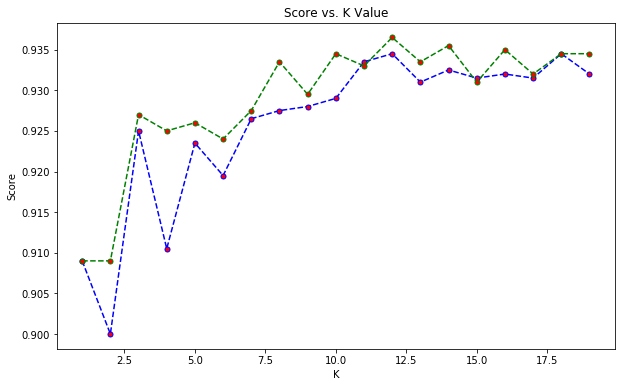

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate['uniform'],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.plot(range(1,20),error_rate['distance'],color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Score')

In [18]:
knn2 = neighbors.KNeighborsClassifier(n_neighbors=12, weights = "distance")
scores = cross_val_score(knn2, train_x, train_y, cv=10)
print (scores.mean(),scores.var())
knn2.fit(train_x, train_y)

0.9365 0.00013024999999999918


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='distance')

<H1> Visualize the predictions

In [19]:
# read test data
test_x = pd.read_csv('test.csv').drop("id",axis = 1)
test_x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [20]:
# fill missing values
# predict missing px_height & sc_w
for col in cols_to_fill:
    train_x[train_x[col] == 0].loc[:,col] = lr_to_fill[col].predict(train_x[train_x[col] == 0].drop(col,axis = 1))

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [21]:
# use knn to predict values
predict_test_y = knn2.predict(test_x)

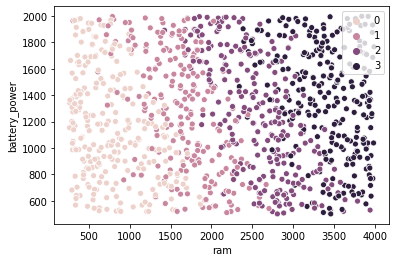

In [22]:
#The 2 most significant variables are:
#1. ram (0.507492)
#2. battery_power (0.076556)
sns.scatterplot(test_x["ram"], test_x["battery_power"], hue=predict_test_y)
plt.xlabel("ram")
plt.ylabel("battery_power")
plt.show()